In [46]:
import xymass
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
#define sample size (number of binary systems)

n_binary=10000

#sample mass function for primaries  
mass_primary=xymass.sample_imf(size=n_binary,model='kroupa').mass 

#sample m_secondary / m_primary from uniform distribution
mass_ratio=np.random.uniform(size=n_binary,low=0.,high=1.) 

#sample (truncated) log-normal period distribution
period=10.**xymass.sample_normal_truncated(size=n_binary,loc=1.,scale=1.,min_value=-np.inf,max_value=np.inf) 

#sample (truncated) log-normal eccentricity distribution
eccentricity=10.**xymass.sample_normal_truncated(size=n_binary,loc=-0.3,scale=1.,min_value=-np.inf,max_value=0.) 

#sample time of observation, as a fraction of the orbital period (sampling uniform distribution here)
f_period=np.random.uniform(size=n_binary,low=0.,high=1.) 

#sample inclination angle (radians), inclination=0 for observer along +z axis, inclination=pi/2 
#for observer in xy plane, allowed from 0 to 2*pi to allow for full range of parity.
inclination=xymass.sample_inclination(size=n_binary) 

#sample longitude of ascending node (radians), longitude=0 if observer is along +x axis, 
#longitude=pi/2 if observer is along +y axis
longitude=np.random.uniform(size=n_binary,low=0,high=2.*np.pi)  

In [48]:
#calculate orbital elements for each system
orbit_snapshot=xymass.sample_orbit_2body(f_period,period=period,eccentricity=eccentricity,\
                                         mass_primary=mass_primary,mass_ratio=mass_ratio,\
                                         longitude=longitude,inclination=inclination)


/Users/walker/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


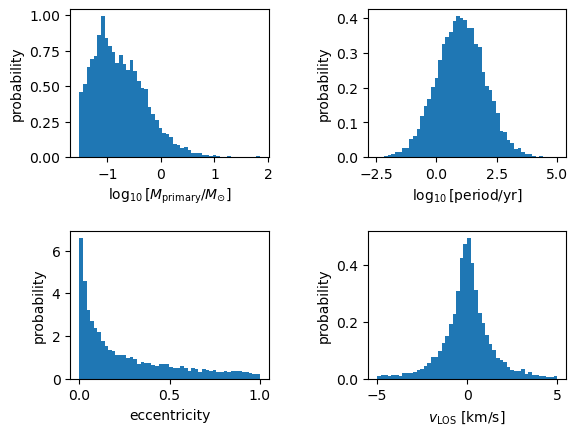

In [49]:
fig=plt.figure(1)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
ax1.hist(np.log10(mass_primary),bins=50,density=True)
ax2.hist(np.log10(period),bins=50,density=True)
ax3.hist(eccentricity,bins=50,density=True)
ax4.hist(orbit_snapshot.v_obs_xyz.T[2],bins=50,density=True,range=[-5,5])
ax1.set_xlabel(r'$\log_{10}[M_{\rm primary}/M_{\odot}]$')
ax2.set_xlabel(r'$\log_{10}[\mathrm{period/yr}]$')
ax3.set_xlabel('eccentricity')
ax4.set_xlabel(r'$v_{\rm LOS}$ [km/s]')
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylabel('probability')
plt.show()

In [50]:
plt.close()

In [51]:
#define parameters of a single orbit
period=1. #yr
eccentricity=0.6
mass_primary=1. #M_sun
mass_ratio=0.2 #M_secondary/M_primary
longitude=15.*np.pi/180. #longitude of ascending node, radians
inclination=81.*np.pi/180. #inclination angle, radian

#sample f_period = time / period uniformly over one full period
f_period=np.linspace(0,1,200)

In [52]:
#calculate orbit
sample_orbit=xymass.sample_orbit_2body(f_period,period=period,eccentricity=eccentricity,\
                                       mass_primary=mass_primary,mass_ratio=mass_ratio,\
                                       longitude=longitude,inclination=inclination)

In [53]:
#animate positions of reduced mass, particle 1 and particle 2

#first, change backend to support animation
%matplotlib tk 
%matplotlib tk
import matplotlib.pyplot as plt

xymass.animation_2body_r(sample_orbit,animation_filename=None)

In [54]:
plt.close()

In [55]:
#animate velocities of reduced mass, particle 1 and particle 2

xymass.animation_2body_v(sample_orbit,animation_filename=None)

In [45]:
plt.close()